In [1]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
data = pd.read_csv("data/titanic.csv")

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Provide a visualization to communicate the analyses below

## How did survival depend on sex and class?

In [4]:
data.groupby(['sex', 'class']).survived.sum().unstack('sex')

sex,female,male
class,,
First,91,45
Second,70,17
Third,72,47


In [5]:
df=data.groupby(['sex', 'class']).survived.sum().unstack('sex').stack()
df=df.reset_index()
df.columns=['class', 'sex', 'survived']
df

,class,sex,survived
0,First,female,91
1,First,male,45
2,Second,female,70
3,Second,male,17
4,Third,female,72
5,Third,male,47


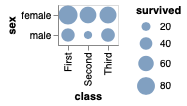

In [52]:
alt.Chart(df).mark_circle().encode(
 x='class',
 y='sex',
 size='survived')

## What was the distribution of passengers in decks

In [36]:
data.groupby(['deck']).age.count()

deck
A    12
B    45
C    51
D    31
E    30
F    11
G     4
Name: age, dtype: int64

In [31]:
df=pd.DataFrame(data.groupby(['deck']).age.count())
df = df.reset_index()
df

,deck,age
0,A,12
1,B,45
2,C,51
3,D,31
4,E,30
5,F,11
6,G,4


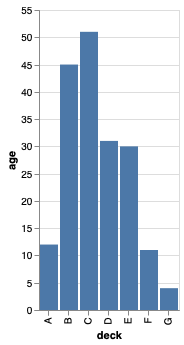

In [32]:
alt.Chart(df).mark_bar().encode(
    x='deck', y='age')

## Does deck correlate with class?

In [33]:
data.groupby(['deck', 'class']).age.count().unstack('class').fillna(0)

class,First,Second,Third
deck,,,
A,12.0,0.0,0.0
B,45.0,0.0,0.0
C,51.0,0.0,0.0
D,27.0,4.0,0.0
E,24.0,3.0,3.0
F,0.0,8.0,3.0
G,0.0,0.0,4.0


In [16]:
df=data.groupby(['deck', 'class']).age.count().unstack('class').fillna(0)
df = df.stack()
df = pd.DataFrame({'number':df})
df = df.reset_index()
df

,deck,class,age
0,A,First,12
1,B,First,45
2,C,First,51
3,D,First,27
4,D,Second,4
5,E,First,24
6,E,Second,3
7,E,Third,3
8,F,Second,8
9,F,Third,3


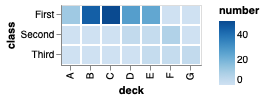

In [37]:
alt.Chart(df).mark_bar().encode( 
    x='deck',
    y='class',
    color='number')

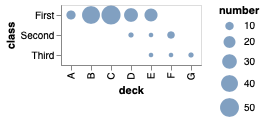

In [40]:
alt.Chart(df).mark_circle().encode( 
    x='deck',
    y='class',
    size='number')

## How did survival depend on deck?

In [41]:
data.groupby(['deck']).survived.sum()

deck
A     7
B    35
C    35
D    25
E    24
F     8
G     2
Name: survived, dtype: int64

In [42]:
df = pd.DataFrame({'survived':data.groupby(['deck']).survived.sum()})
df = df.reset_index()
df

,deck,survived
0,A,7
1,B,35
2,C,35
3,D,25
4,E,24
5,F,8
6,G,2


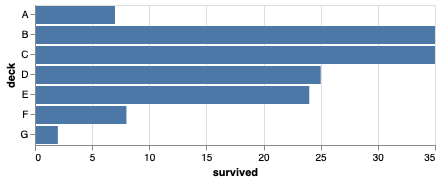

In [43]:
alt.Chart(df).mark_bar().encode(
    y='deck',
    x='survived')